In [1]:
# Import the necessary libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df =pd.read_excel(r"C:/Users/prern/OneDrive/Documents/weather_data.xlsx") 
df

,Date-Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km-h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86.0,4.0,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87.0,4.0,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88.0,6.0,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88.0,7.0,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8782,12-31-2012 21:00,-0.5,-1.5,93.0,28.0,4.8,99.95,Snow
8783,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow
8784,12-31-2012 23:00,0.0,-2.1,86.0,30.0,11.3,99.89,Snow
8785,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow


In [3]:
# Basic information about the data set
df.isnull().sum()

Date-Time           0
Temp_C              0
Dew Point Temp_C    1
Rel Hum_%           9
Wind Speed_km-h     1
Visibility_km       8
Press_kPa           1
Weather             1
dtype: int64

In [4]:
# Rename columns
df.columns = ['Datetime', 'Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]', 'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]', 'Weather']
df

,Datetime,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86.0,4.0,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87.0,4.0,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88.0,6.0,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88.0,7.0,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8782,12-31-2012 21:00,-0.5,-1.5,93.0,28.0,4.8,99.95,Snow
8783,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow
8784,12-31-2012 23:00,0.0,-2.1,86.0,30.0,11.3,99.89,Snow
8785,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow


In [5]:
df = df.drop('Weather', axis=1).join(
    df['Weather'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Weather')
)
df

,Datetime,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86.0,4.0,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87.0,4.0,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,4.0,101.26,Freezing Drizzle
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,4.0,101.26,Fog
3,2012-01-01 03:00:00,-1.5,-3.2,88.0,6.0,4.0,101.27,Freezing Drizzle
...,...,...,...,...,...,...,...,...
8782,12-31-2012 21:00,-0.5,-1.5,93.0,28.0,4.8,99.95,Snow
8783,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow
8784,12-31-2012 23:00,0.0,-2.1,86.0,30.0,11.3,99.89,Snow
8785,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow


In [6]:
data = pd.DataFrame(df)

#Checking which all column has missing values
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

# indices at which data are missing
missing_values_indices = data.index[data.isnull().any(axis=1)].tolist()
print(missing_values_indices);


Dew Point Temp [C]    1
Rel Hum [%]           9
Wind Speed [km/h]     1
Visibility [km]       8
Press [kPa]           1
Weather               1
dtype: int64
[9, 21, 54, 105, 6125, 6126, 6127, 6128, 6129, 6167, 6168, 6169, 6170, 6171, 6190, 6205, 6206, 6218, 6351, 6460, 8779]


In [7]:
df

,Datetime,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86.0,4.0,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87.0,4.0,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,4.0,101.26,Freezing Drizzle
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,4.0,101.26,Fog
3,2012-01-01 03:00:00,-1.5,-3.2,88.0,6.0,4.0,101.27,Freezing Drizzle
...,...,...,...,...,...,...,...,...
8782,12-31-2012 21:00,-0.5,-1.5,93.0,28.0,4.8,99.95,Snow
8783,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow
8784,12-31-2012 23:00,0.0,-2.1,86.0,30.0,11.3,99.89,Snow
8785,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow


# HANDLE MISSING VALUES

In [8]:
# Impute missing values using the mean

columns = ['Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]',
       'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]'];
for column in columns:
    data[column].fillna(data[column].mean(), inplace=True)
    
# Impute missing values using the mode
data['Weather'].fillna(data['Weather'].mode()[0], inplace=True)


In [9]:
#Checking which all column has missing values
missing_values = data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Series([], dtype: int64)


OBSERVATIONS:
HANDLING MISSING VALUES IN PYTHON REFERS TO THE PROCESS OF DEALING WITH ANY DATA POINTS IN A DATASET THAT ARE MISSING OR UNAVAILABLE. WHEN WORKING WITH REAL-WORLD DATA, ITS COMMON TO ENCOUNTER MISSING VALUES, WHICH CAN AFFECT THE ACCURACY OF OUR ANALYSIS OR MACHINE LEARNING MODELS. IT IS CRUCIAL TO ENSURE THE QUALITY AND RELIABILITY OF OUR ANALYSIS OR MODELS. ITS IMPORTANT TO CHOOSE THE APPROPRIATE METHOD BASED ON THE NATURE OF THE DATA AND THE ANALYSIS BEING PERFORMED.

# HANDLING OUTLIERS

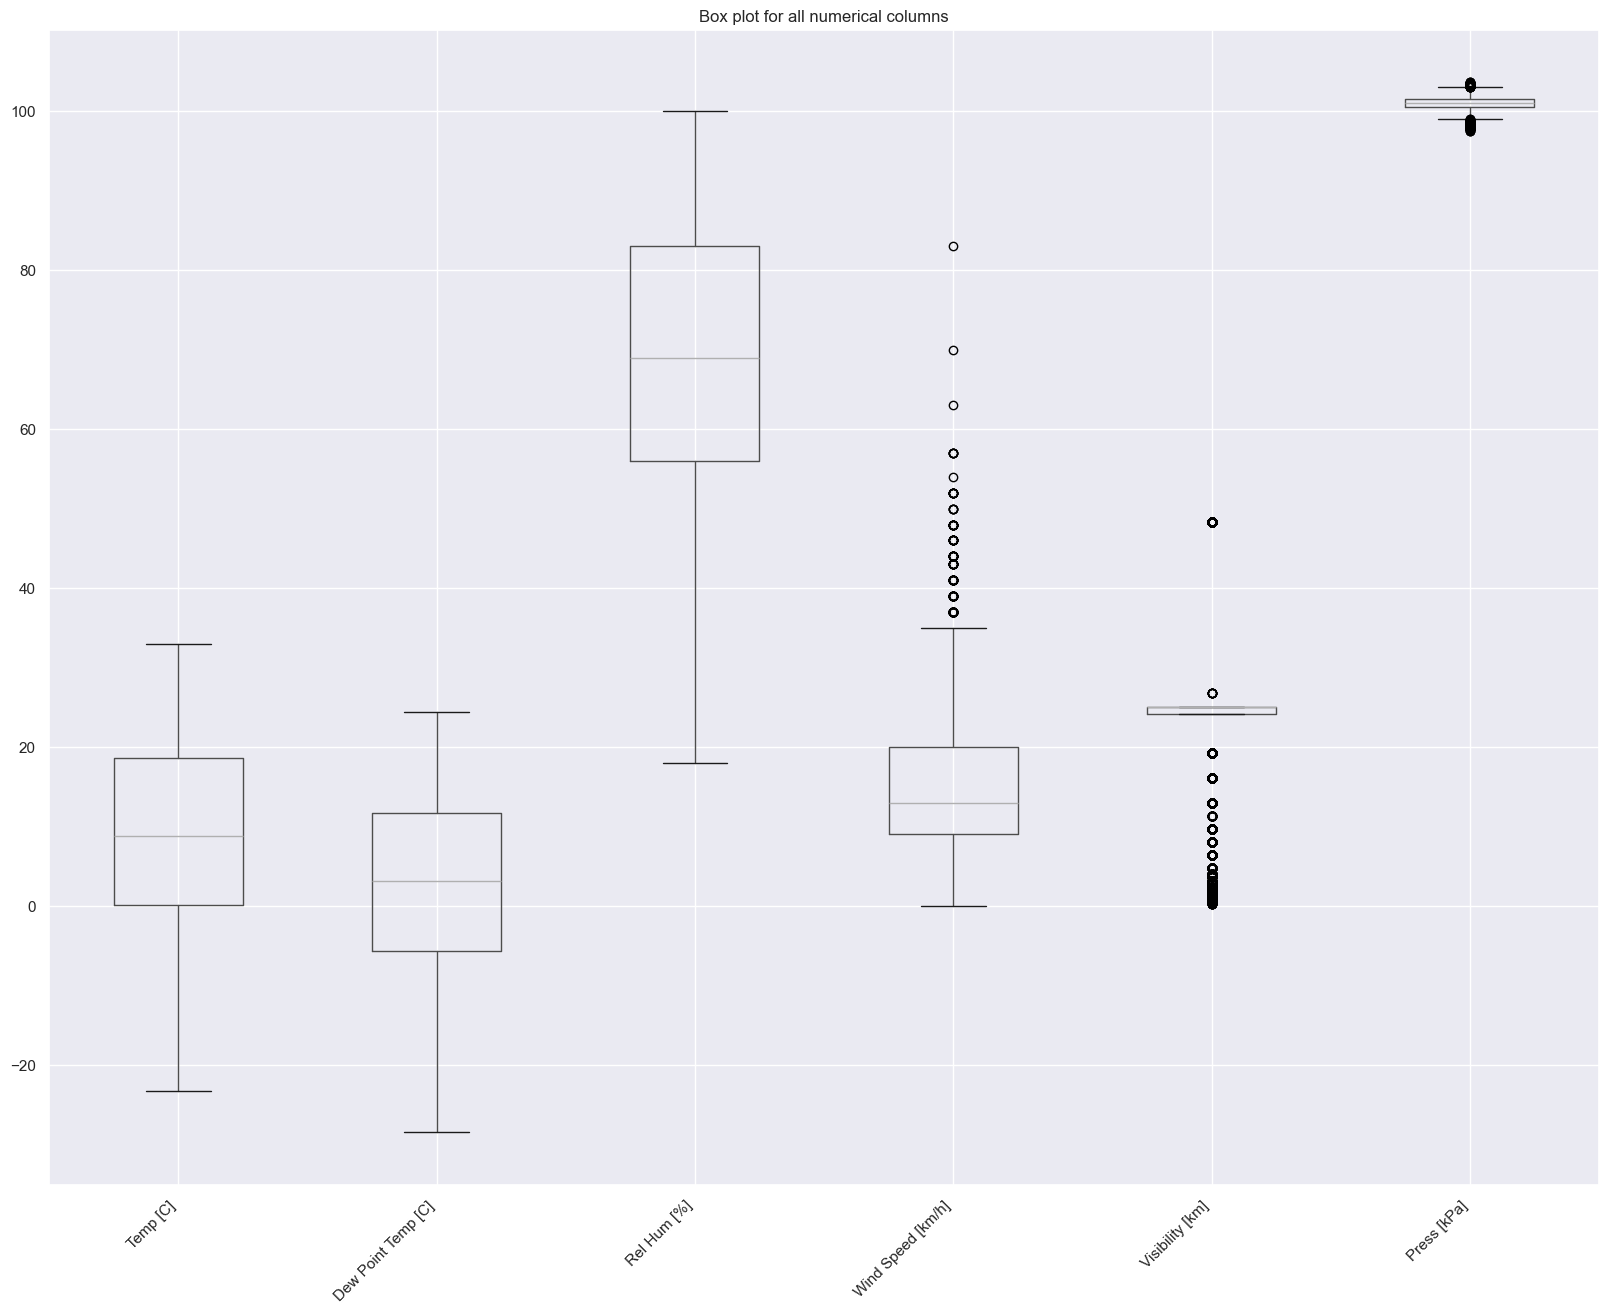

In [10]:
plt.figure(figsize=(20, 15))

# Exclude 'Date-Time' and 'Weather' columns for box plot
columns_to_plot = df.select_dtypes(include=['float64', 'int64']).columns

df[columns_to_plot].boxplot()
plt.title('Box plot for all numerical columns')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# finding out and handling outliers using Interquartile Range (IQR)


columns = ['Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]',
       'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]']

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(IQR, lower_bound, upper_bound);
    
    # Filter out outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n{outliers}\n");
    median = df[col].median();
    print(f"median in {col}:\n{median}\n");

    
    # Impute outliers with the median
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median

# Loop through each column if you have multiple columns to check
for column in columns:
    detect_outliers(df, column)

18.5 -27.65 46.35
Outliers in Temp [C]:
Empty DataFrame
Columns: [Datetime, Temp [C], Dew Point Temp [C], Rel Hum [%], Wind Speed [km/h], Visibility [km], Press [kPa], Weather]
Index: []

median in Temp [C]:
8.8

17.375 -31.7625 37.7375
Outliers in Dew Point Temp [C]:
Empty DataFrame
Columns: [Datetime, Temp [C], Dew Point Temp [C], Rel Hum [%], Wind Speed [km/h], Visibility [km], Press [kPa], Weather]
Index: []

median in Dew Point Temp [C]:
3.2

27.0 15.5 123.5
Outliers in Rel Hum [%]:
Empty DataFrame
Columns: [Datetime, Temp [C], Dew Point Temp [C], Rel Hum [%], Wind Speed [km/h], Visibility [km], Press [kPa], Weather]
Index: []

median in Rel Hum [%]:
69.0

11.0 -7.5 36.5
Outliers in Wind Speed [km/h]:
                 Datetime  Temp [C]  Dew Point Temp [C]  Rel Hum [%]  \
26    2012-02-01 01:00:00       4.6                 0.0         72.0   
33    2012-02-01 08:00:00       1.9                -3.3         68.0   
34    2012-02-01 09:00:00       1.8                -3.7         67.0

OBSERVATIONS:
A BOX PLOT IN PYTHON CAN HELP US VISUALISE THE DISTRIBUTION OF A DATASET AND IDENTIFY OUTLIERS. IN A BOX PLOT, OUTLIERS ARE USUALLY REPRESENTED AS INDIVIDUAL POINTS BEYOND THE "WHISKERS" OF THE PLOT. IF A DATA POINT FALLS BELOW Q1-Q5*IQR (INTERQUARTILE RANGE) OR ABOVE Q3+1.5*IQR, WHERE Q1 IS THE FIRST QUARTILE, Q3 IS THE THIRD QUARTILE AND IQR IS THE INTERQUARTILE RANGE, THEN ITS CONSIDERED AN OUTLIER. THESE OUTLIERS ARE SHOWN AS POINTS OUTSIDE THE WHISKERS IN THE BOX PLOT. THIS VISUALISATION CAN HELP US QUICKLY SPOT EXTREME VALUES IN OUR DATA THAT MIGHT BE ERRORS OR INTERESTING DATA POINTS TO INVESTIGATE FURTHER.

In [12]:
df

,Datetime,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86.0,4.0,25.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87.0,4.0,25.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,25.0,101.26,Freezing Drizzle
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,25.0,101.26,Fog
3,2012-01-01 03:00:00,-1.5,-3.2,88.0,6.0,25.0,101.27,Freezing Drizzle
...,...,...,...,...,...,...,...,...
8782,12-31-2012 21:00,-0.5,-1.5,93.0,28.0,25.0,99.95,Snow
8783,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,25.0,99.91,Snow
8784,12-31-2012 23:00,0.0,-2.1,86.0,30.0,25.0,99.89,Snow
8785,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,25.0,99.91,Snow


In [13]:
#This will create a new DataFrame duplicates containing only the rows that were marked as True by df.duplicated(), which are the duplicate rows.
duplicates = df[df.duplicated()]
print(duplicates)

                 Datetime  Temp [C]  Dew Point Temp [C]  Rel Hum [%]  \
17    2012-01-01 16:00:00       2.6                -0.2         82.0   
8785     12-31-2012 22:00      -0.2                -1.8         89.0   
8786     12-31-2012 15:00      -2.3                -4.6         84.0   

      Wind Speed [km/h]  Visibility [km]  Press [kPa]        Weather  
17                 13.0             25.0        99.93  Mostly Cloudy  
8785               28.0             25.0        99.91           Snow  
8786                9.0             25.0       100.47           Snow  


In [14]:
# This will keep only the unique rows and remove any duplicates from df. keep='first' keeps the first occurrence and remove subsequent duplicates
df_unique = df.drop_duplicates(keep='first');
df_unique

,Datetime,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86.0,4.0,25.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87.0,4.0,25.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,25.0,101.26,Freezing Drizzle
2,2012-01-01 02:00:00,-1.8,-3.4,89.0,7.0,25.0,101.26,Fog
3,2012-01-01 03:00:00,-1.5,-3.2,88.0,6.0,25.0,101.27,Freezing Drizzle
...,...,...,...,...,...,...,...,...
8780,12-31-2012 19:00,0.1,-2.7,81.0,30.0,25.0,100.13,Snow
8781,12-31-2012 20:00,0.2,-2.4,83.0,24.0,25.0,100.03,Snow
8782,12-31-2012 21:00,-0.5,-1.5,93.0,28.0,25.0,99.95,Snow
8783,12-31-2012 22:00,-0.2,-1.8,89.0,28.0,25.0,99.91,Snow


In [15]:
# Convert the 'Date' column to datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Format the 'Date' column to the desired string format
df['Datetime'] = df['Datetime'].dt.strftime('%d-%m-%Y %H:%M')

df

,Datetime,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa],Weather
0,01-01-2012 00:00,-1.8,-3.9,86.0,4.0,25.0,101.24,Fog
1,01-01-2012 01:00,-1.8,-3.7,87.0,4.0,25.0,101.24,Fog
2,01-01-2012 02:00,-1.8,-3.4,89.0,7.0,25.0,101.26,Freezing Drizzle
2,01-01-2012 02:00,-1.8,-3.4,89.0,7.0,25.0,101.26,Fog
3,01-01-2012 03:00,-1.5,-3.2,88.0,6.0,25.0,101.27,Freezing Drizzle
...,...,...,...,...,...,...,...,...
8782,31-12-2012 21:00,-0.5,-1.5,93.0,28.0,25.0,99.95,Snow
8783,31-12-2012 22:00,-0.2,-1.8,89.0,28.0,25.0,99.91,Snow
8784,31-12-2012 23:00,0.0,-2.1,86.0,30.0,25.0,99.89,Snow
8785,31-12-2012 22:00,-0.2,-1.8,89.0,28.0,25.0,99.91,Snow


# CORRELATION ANALYSIS

In [16]:
# To perform a correlation analysis in pandas, you’ll need to use the numerical columns only
numerical_df = df_unique.select_dtypes(include=['float64'])
correlation_matrix = numerical_df.corr()
correlation_matrix

,Temp [C],Dew Point Temp [C],Rel Hum [%],Wind Speed [km/h],Visibility [km],Press [kPa]
Temp [C],1.000000,0.930543,-0.228070,-0.049442,-0.124943,-0.238438
Dew Point Temp [C],0.930543,1.000000,0.137105,-0.091494,-0.132473,-0.326465
Rel Hum [%],-0.228070,0.137105,1.000000,-0.110336,0.029095,-0.233761
Wind Speed [km/h],-0.049442,-0.091494,-0.110336,1.000000,-0.116983,-0.268108
Visibility [km],-0.124943,-0.132473,0.029095,-0.116983,1.000000,0.095316
Press [kPa],-0.238438,-0.326465,-0.233761,-0.268108,0.095316,1.000000


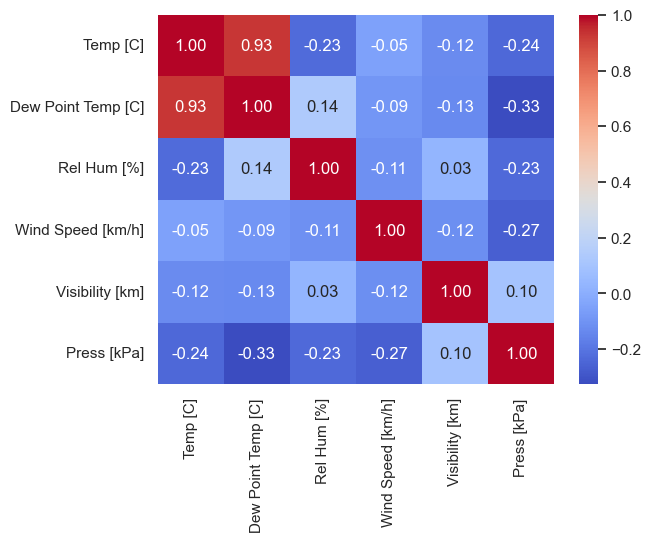

In [17]:
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

OBSERVATIONS:
INTERPRETING THE CORRELATION IN A WEATHER DATASET HELPS US UNDERSTAND HOW WEATHER FACTORS INFLUENCE EACH OTHER.
THE CORRELATION COEFFICIENT RANGES FROM -1 TO 1:
A CORRELATION OF 1 INDICATES A PERFECT POSITIVE RELATIONSHIP, MEANING AS ONE VARIABLE INCREASES, THE OTHER ALSO INCREASES PROPORTIONATELY.
A CORRELATION OF 0 MEANS THERE IS NO LINEAR RELATIONSHIP BETWEEN THE VARIABLES.



# REGRESSION ANALYSIS

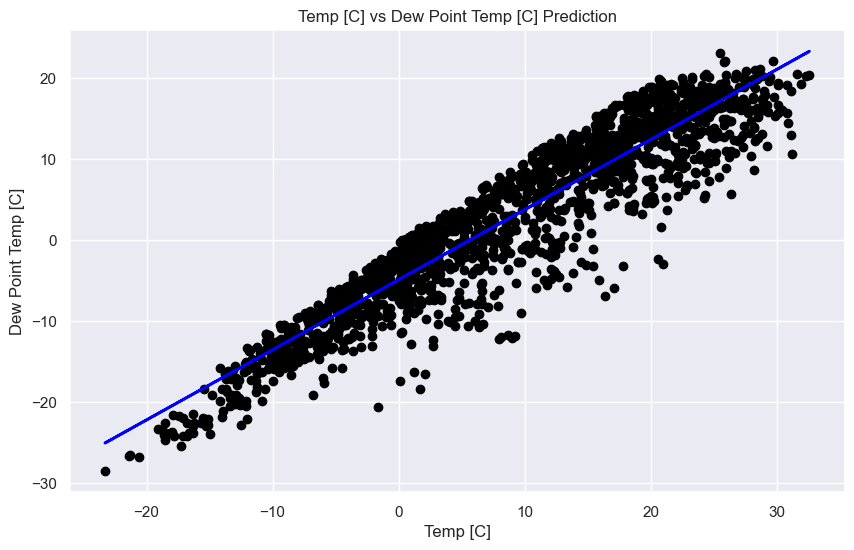

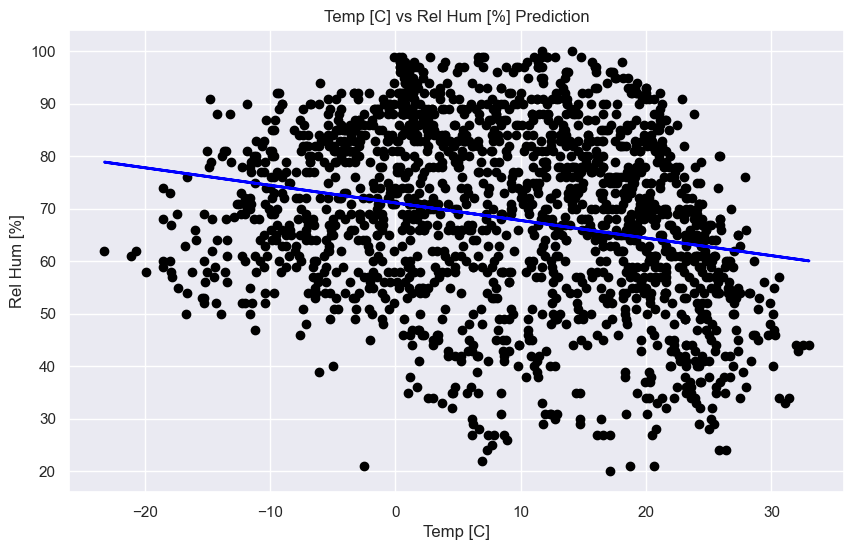

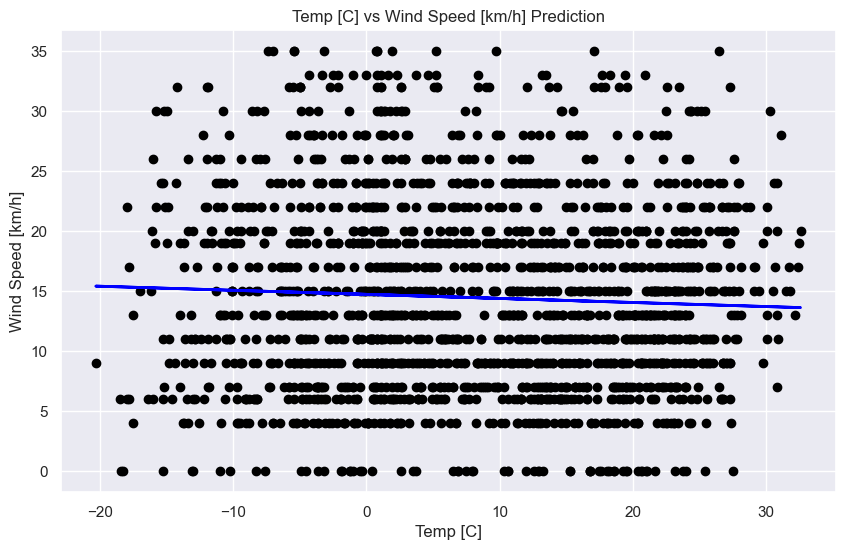

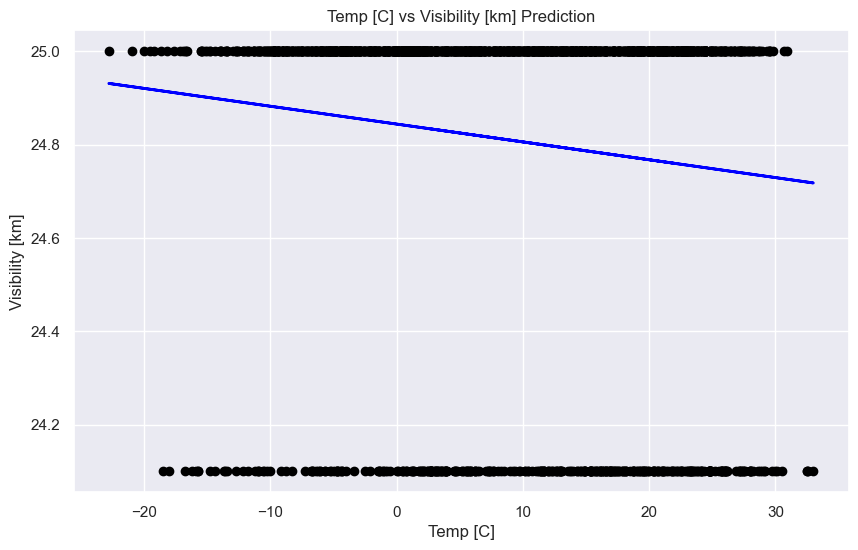

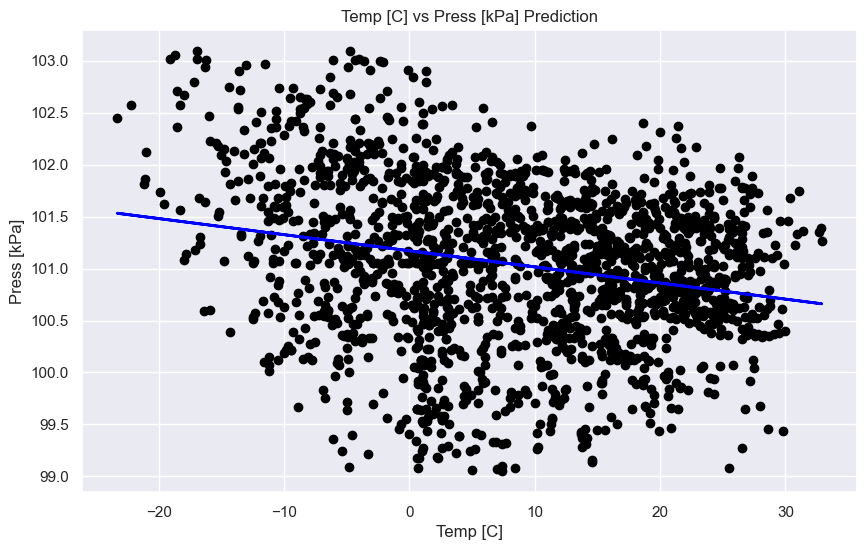

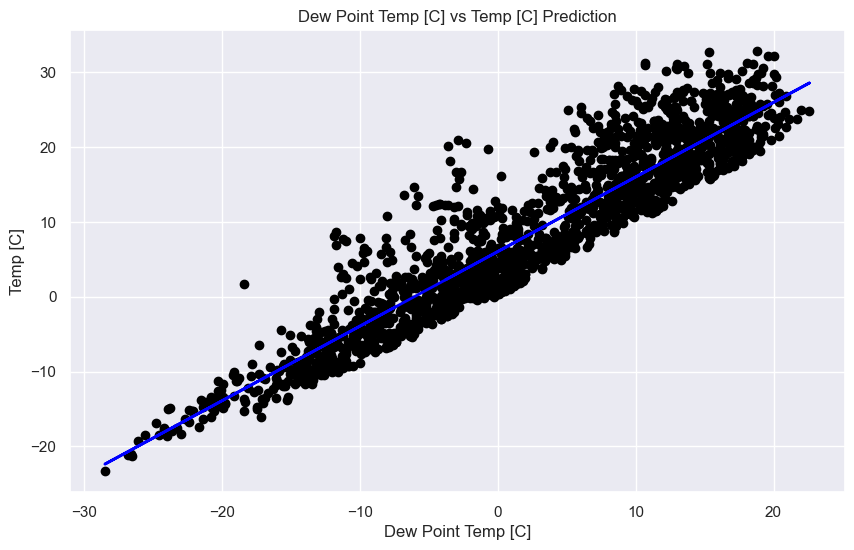

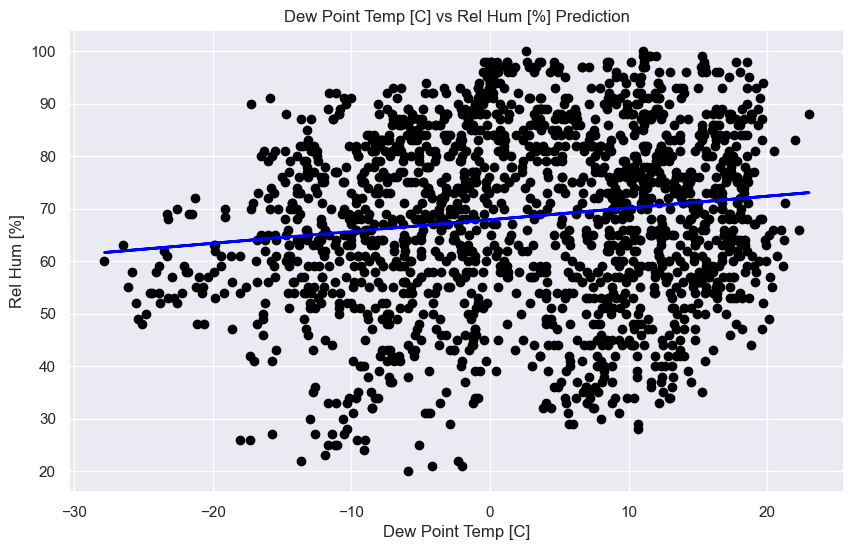

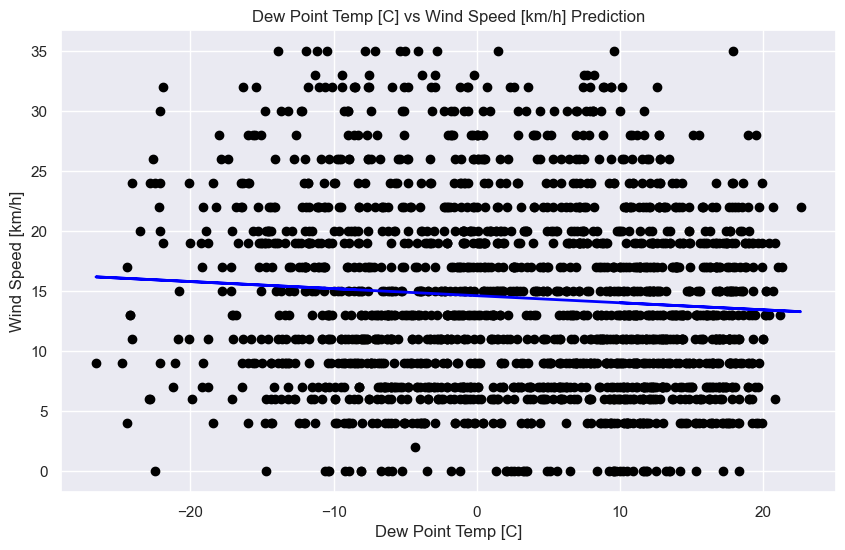

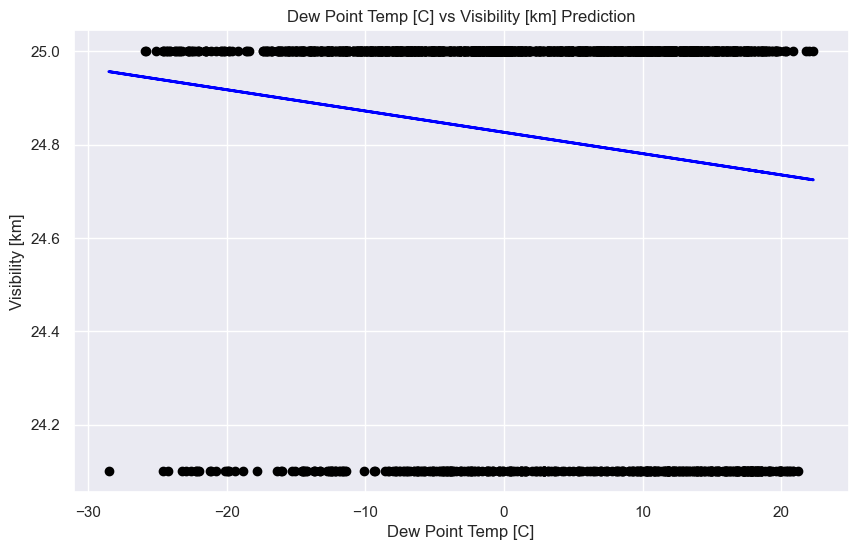

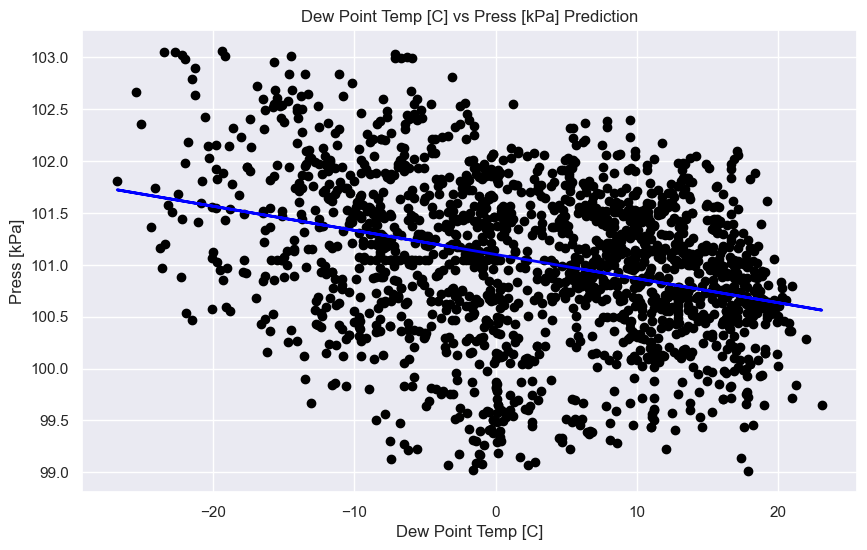

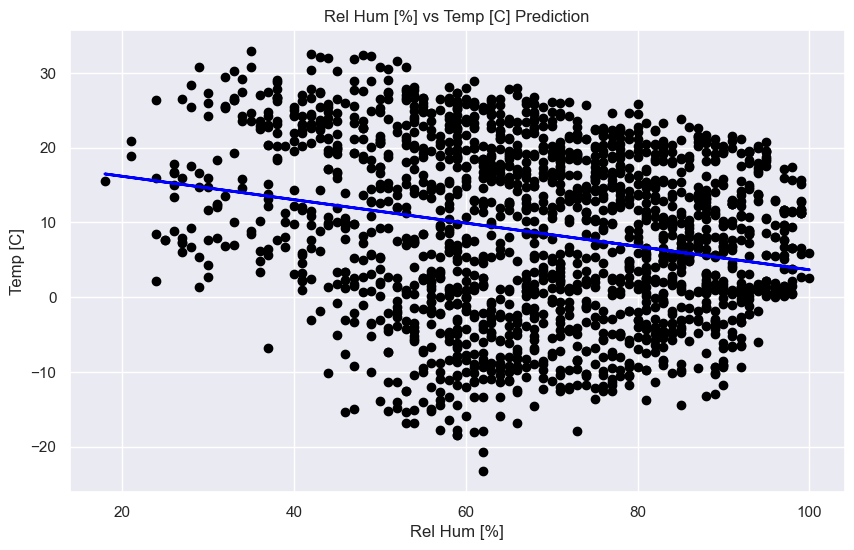

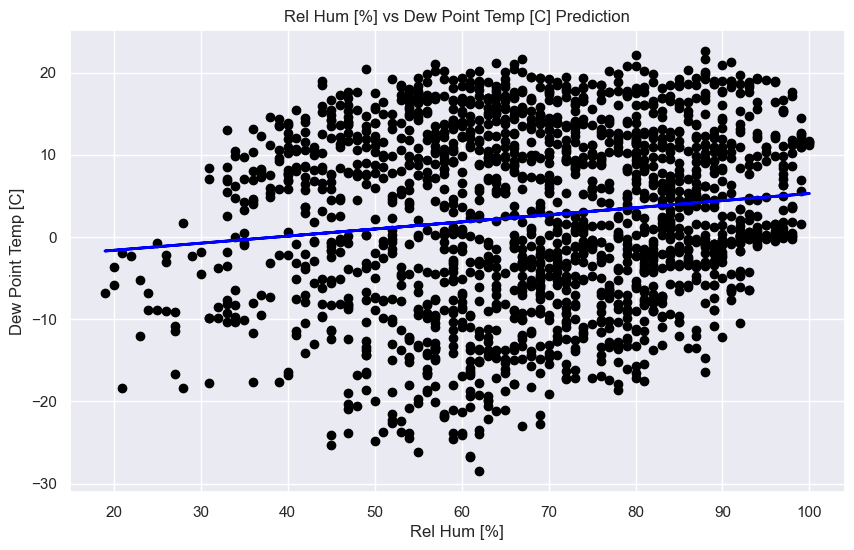

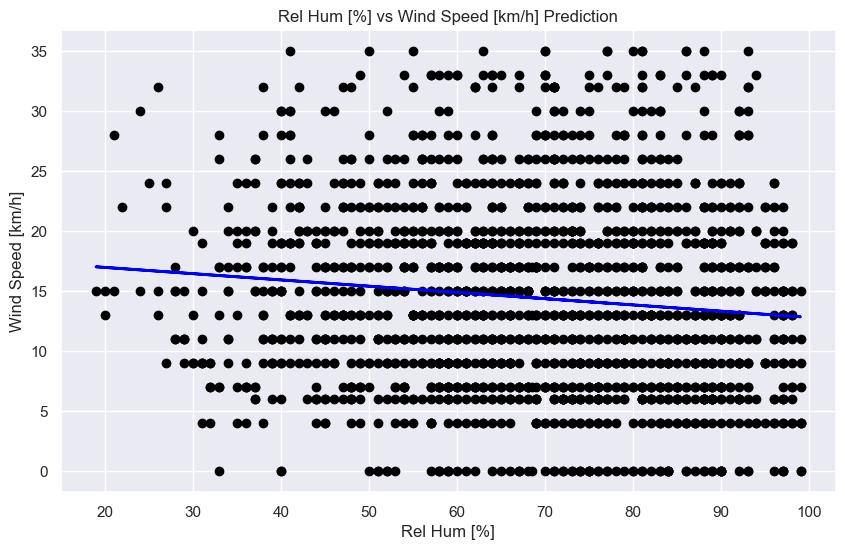

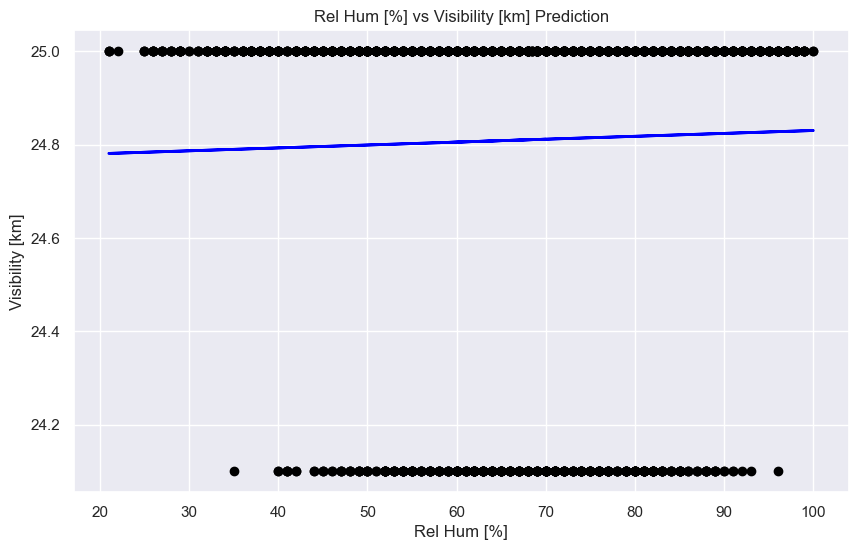

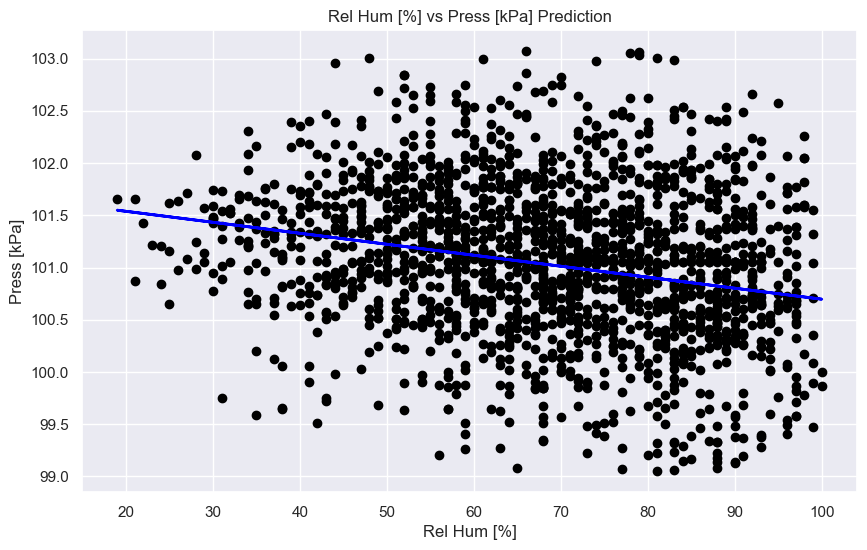

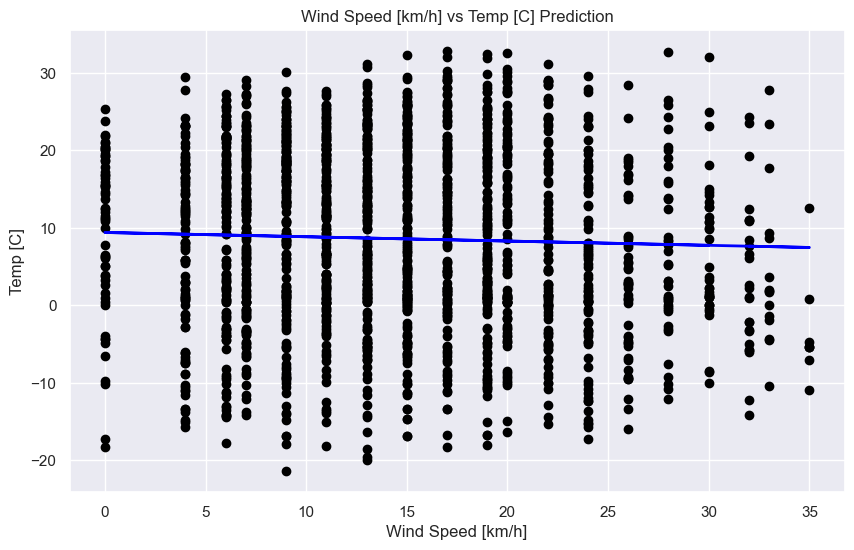

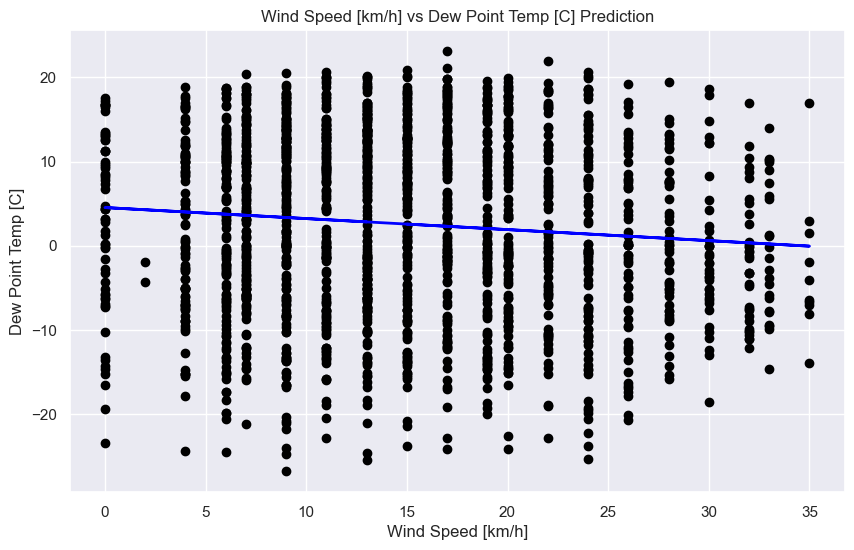

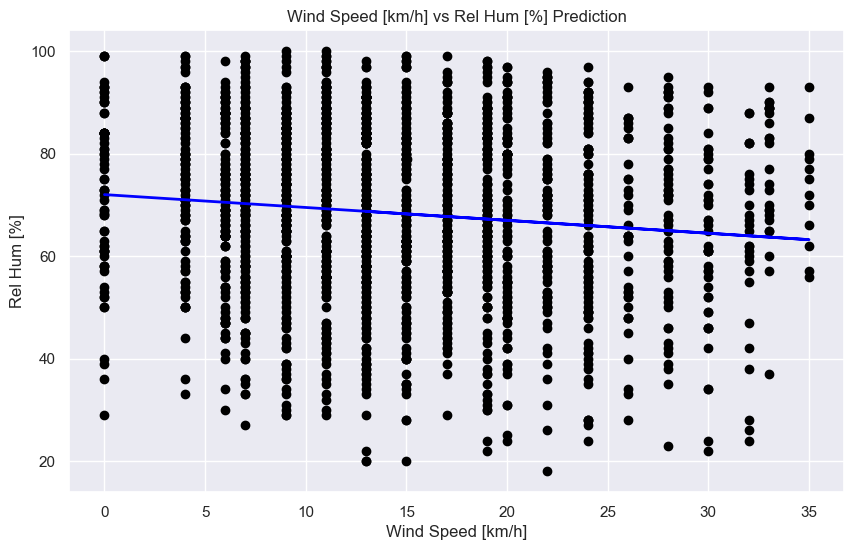

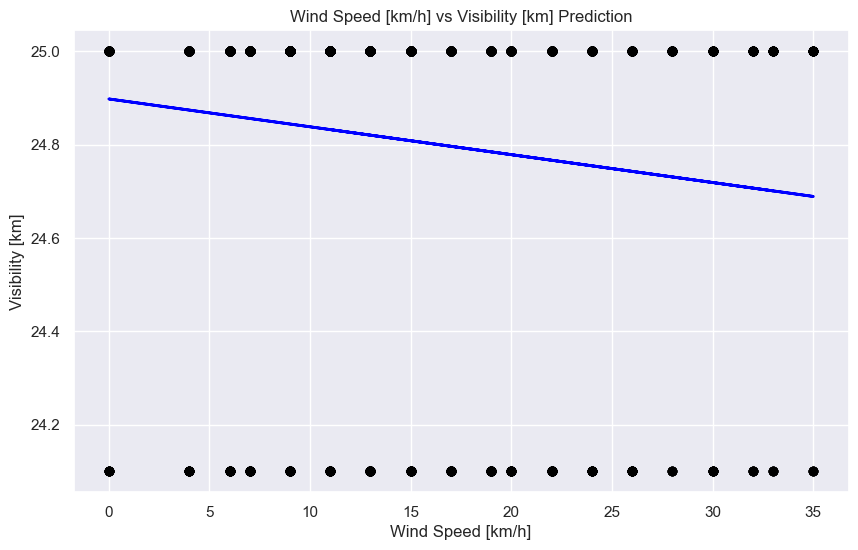

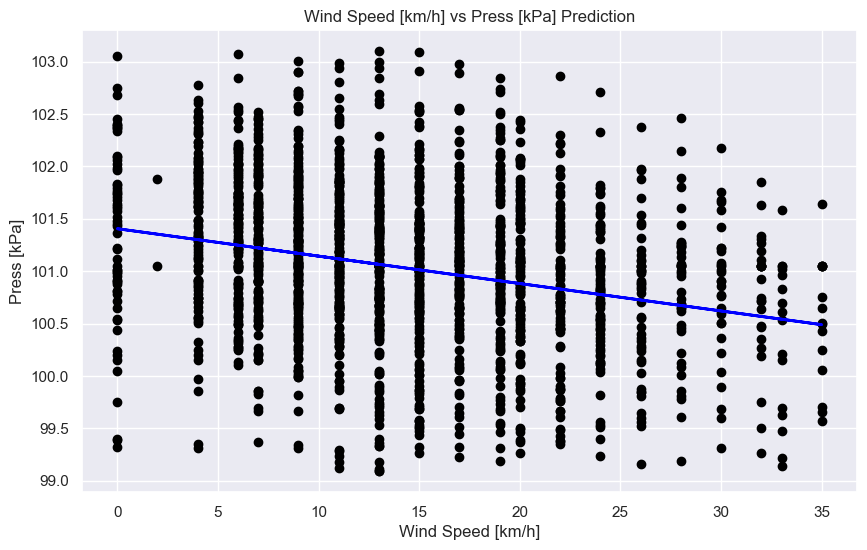

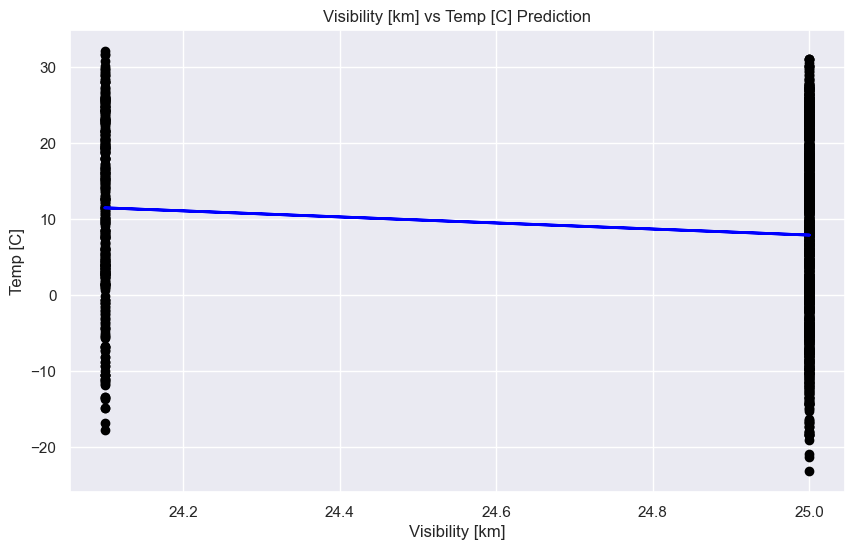

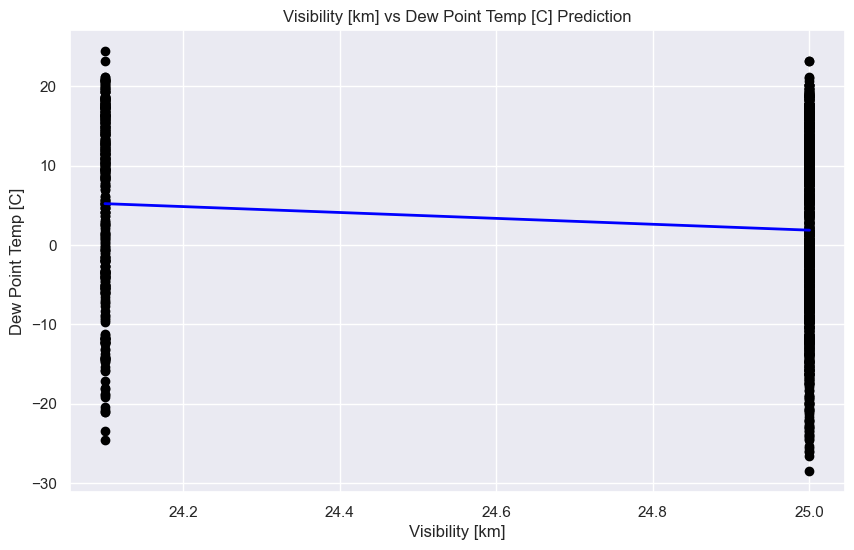

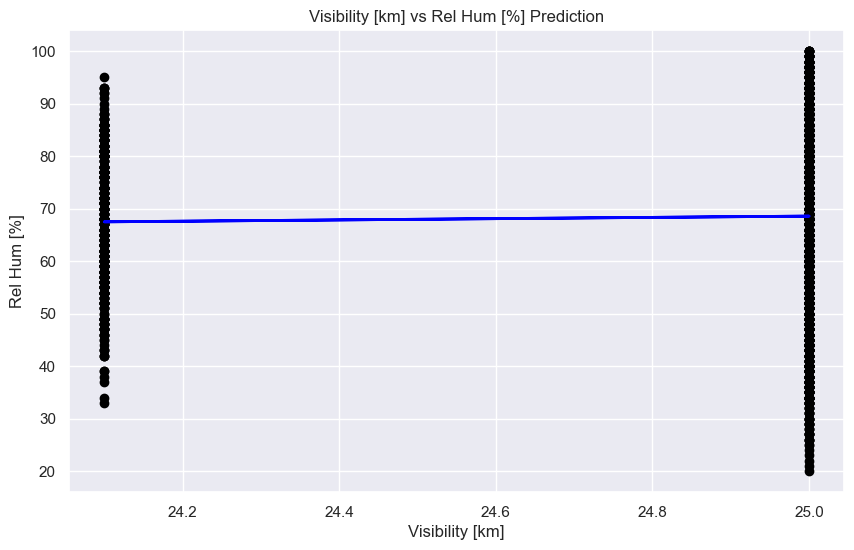

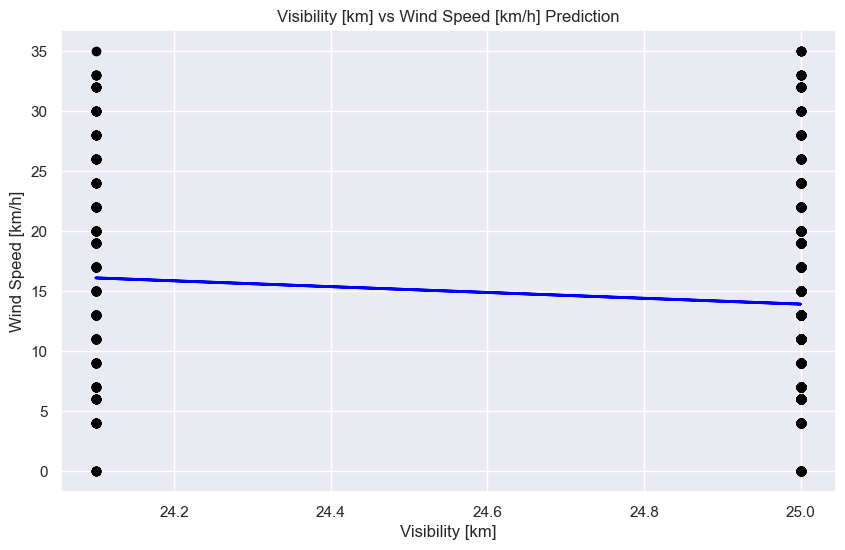

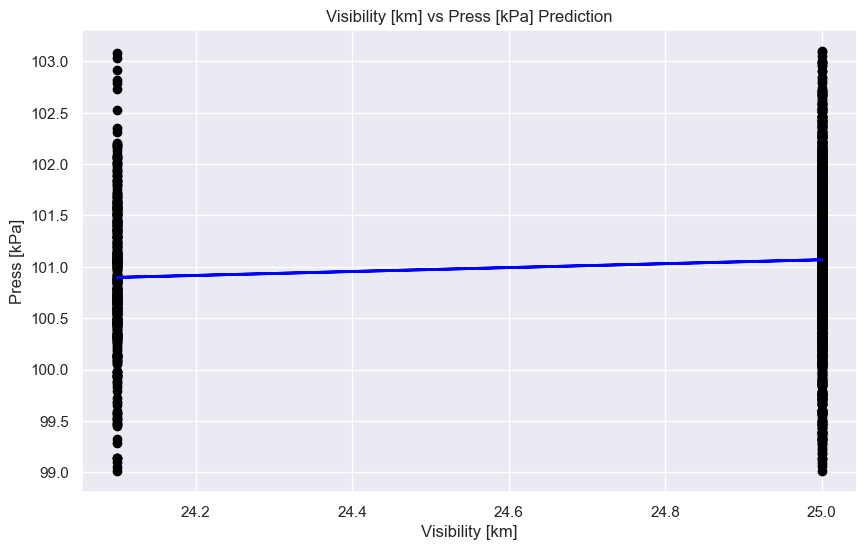

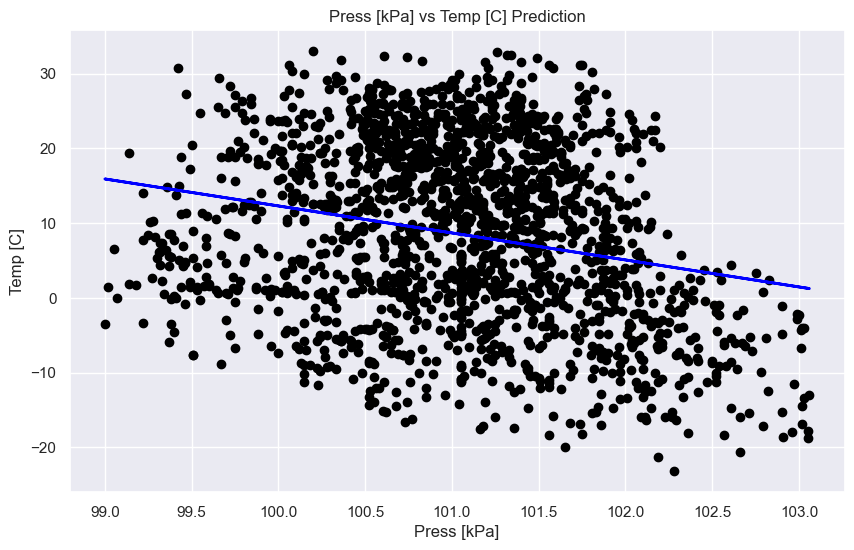

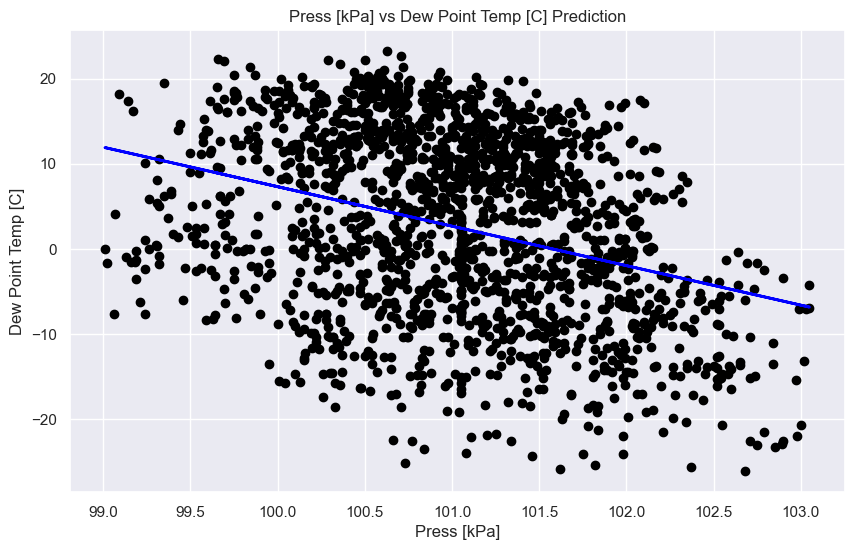

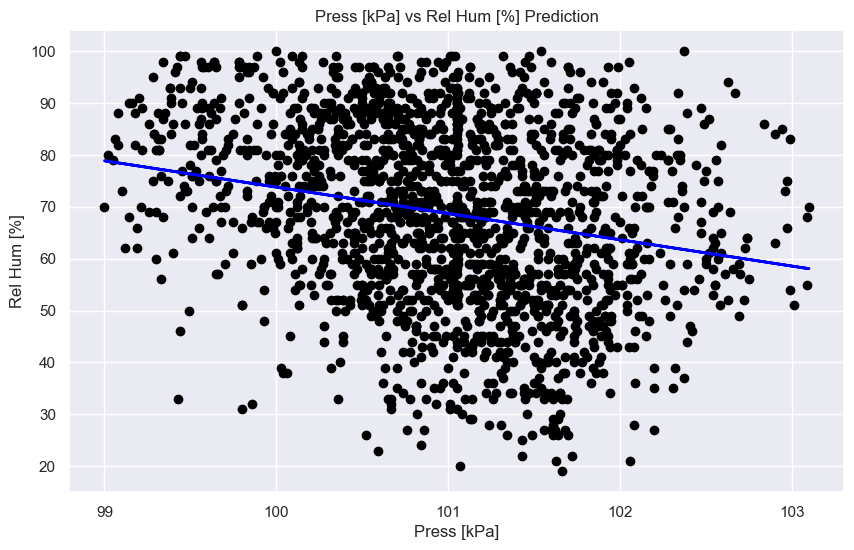

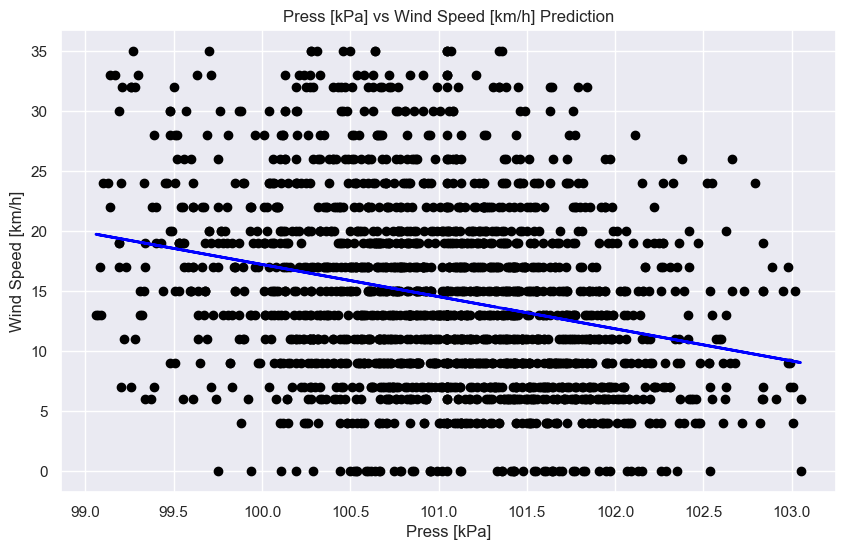

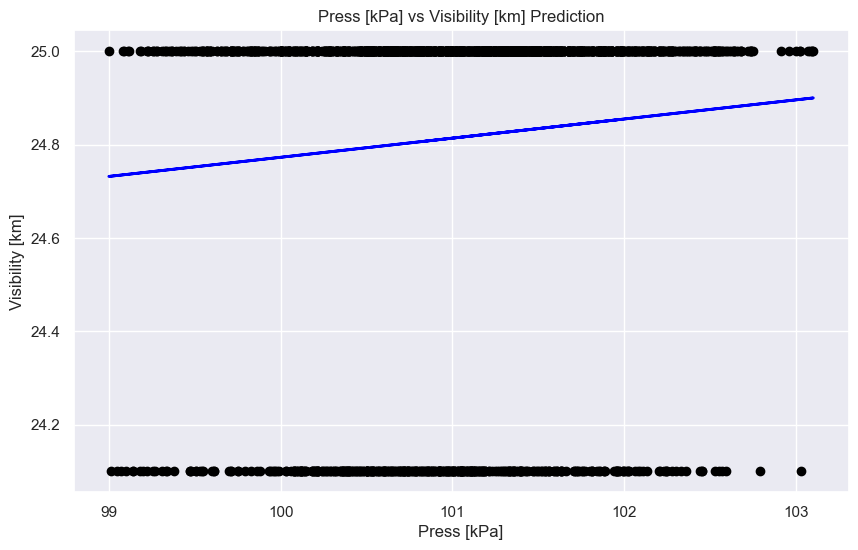

In [18]:
# List of columns to create graphs for
columns = df[['Temp [C]', 'Dew Point Temp [C]', 'Rel Hum [%]',
           'Wind Speed [km/h]', 'Visibility [km]', 'Press [kPa]']]
# Loop through each column as an independent variable
for independent_col in columns:
    # Loop through each column as a dependent variable
    for dependent_col in columns:
        # Skip if independent and dependent variables are the same
        if independent_col == dependent_col:
            continue
        
        X = df[[independent_col]]  # Independent variable
        y = df[dependent_col]  # Dependent variable

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        # Initialize the model
        model = LinearRegression()

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

        # Calculate mean squared error (MSE)
        mse = mean_squared_error(y_test, predictions)
        
        # Plotting results
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test, y_test, color='black')
        plt.plot(X_test, predictions, color='blue', linewidth=2)
        
        plt.xlabel(independent_col)
        plt.ylabel(dependent_col)
        plt.title(f'{independent_col} vs {dependent_col} Prediction')
       
        plt.show()


OBSERVATIONS: 
BY INTERPRETING THE RESULTS OF A REGRESSION ANALYSIS IN A WEATHER DATASET, WE CAN GAIN INSIGHTS INTO HOW DIFFERENT WEATHER VARIABLES INTERACT AD INFLUENCE EACH OTHER, WHICH CAN BE VALUABLE FOR MAKING PREDICTIONS, UNDERSTANDING PATTERNS AND IMPROVING WEATHER FORECASTING MODELS.
FOR EXAMPLE, IN A SIMPLE LINEAR REGRESSION BETWEEN TEMPERATURE AND HUMIDITY, WE MIGHT FIND THAT AS TEMPERATURE INCREASES, HUMIDITY TENDS TO INCREASE AS WELL. THE REGRESSION ANALYSIS PROVIDES US WITH A MATHEMATICAL EQUATION THAT REPRESENTS THIS RELATIONSHIP, ALLOWING US TO MAKE PREDICTIONS ABOUT HUMIDITY BASED ON TEMPERATURE.